# **생능 출판사 "으뜸 데이터 분석과과 머신러닝"(1판) 교재의 소스 코드**
## *12장 텐서플로로 따라하는 딥러닝*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 12.1 가장 인기있는 기계학습과 딥러닝 플랫폼 : 텐서플로

In [ ]:
import tensorflow as tf    # tensorflow의 별명은 tf로 한다

print(tf.__version__)      # version 앞뒤로 두 개의 밑줄을 사용한다

2.6.0


### 12.2 MNIST 데이터 가져오기

In [ ]:
# tensorflow와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) =\
mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('train_images.shape =', train_images.shape)
print('test_images.shape =', test_images.shape)
print('train_labels.shape =', train_labels.shape)
print('test_labels.shape =', test_labels.shape)

train_images.shape = (60000, 28, 28)
test_images.shape = (10000, 28, 28)
train_labels.shape = (60000,)
test_labels.shape = (10000,)


In [ ]:
num = train_images[0]
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

### 12.3 MNIST 데이터 그리기

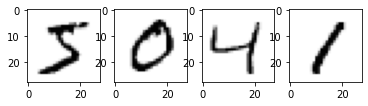

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys') # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1], cmap='Greys') # 두 번째 훈련용 데이터
ax3.imshow(train_images[2], cmap='Greys') # 세 번째 훈련용 데이터
ax4.imshow(train_images[3], cmap='Greys') # 네 번째 훈련용 데이터

In [ ]:
print('train_labels[:4] =', train_labels[:4])

train_labels[:4] = [5 0 4 1]


In [ ]:
# 입력값 전처리 : 0에서 1사이의 값으로 입력 데이터를 가공함
train_images, test_images = train_images / 255, test_images / 255

### 12.4 심층 신경망 모델을 만들고 하이퍼파라미터를 튜닝하자

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()   # 모델의 구조를 요약하여 살펴보자

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### 12.5 인공 신경망을 학습시켜 보자

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0269 - accuracy: 0.9912
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0195 - accuracy: 0.9940
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0158 - accuracy: 0.9949
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0088 - accuracy: 0.9971


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.0787 - accuracy: 0.9791

테스트 정확도: 0.9790999889373779


### 12.6 인공 신경망의 성능을 개선해 보자

In [ ]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dense(256, activation='relu'),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',\
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images,  test_labels,\
                                     verbose=0)
print('\n테스트 정확도:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6432 - accuracy: 0.7940
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2925 - accuracy: 0.9131
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2160 - accuracy: 0.9351
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1693 - accuracy: 0.9482
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1380 - accuracy: 0.9579
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1160 - accuracy: 0.9640
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0983 - accuracy: 0.9699
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0853 - accuracy: 0.9735
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9763
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.068

In [ ]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dense(1256, activation='relu'),
   keras.layers.Dense(512, activation='relu'),
   keras.layers.Dense(256, activation='relu'),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',\
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images,  test_labels,\
                                     verbose=0)
print('\n테스트 정확도:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 2.3016 - accuracy: 0.1118
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 2.3014 - accuracy: 0.1122
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1256)              985960    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               643584    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 1,787,582
Trainable params: 1,787,582
Non-trainable params: 0
____________________________________________

### 12.7 새 이미지를 잘 학습하는가 알아보자

In [ ]:
test_images.shape

(10000, 28, 28)

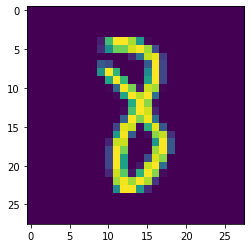

In [ ]:
randIdx = np.random.randint(0, 6000)  # 6000개의 테스트 이미지 중 하나를 선택
plt.imshow(test_images[randIdx])

In [ ]:
yhat = model.predict(test_images[randIdx])

ValueError: ignored

In [ ]:
pred = model.predict( test_images[randIdx][np.newaxis, :, :])
pred

array([[3.3665258e-17, 3.4267222e-10, 8.0464076e-08, 9.9999988e-01,
        7.2984026e-15, 1.9231989e-11, 5.2672438e-21, 2.5793229e-11,
        4.3920014e-09, 6.1924599e-10]], dtype=float32)

In [ ]:
print(pred.argmax())

3


### 12.8 부드러운 최대값을 출력하는 소프트맥스 함수

In [ ]:
import numpy as np

def softmax(a): 
    exp_of_a = np.exp(a)       # 각각의 지수 함수
    sum_exp = np.sum(exp_of_a) # 지수 함수값의 합
    y = exp_of_a / sum_exp     # 각각의 확률값을 구함
    return y

a = np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a)

SyntaxError: ignored

In [ ]:
print('소프트맥스 함수의 최대값 :', np.max(softmax(a)))

NameError: ignored

### 12.9 직접 만든 이미지를 업로드하고 시각화하자

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving myNumber.png to myNumber (2).png


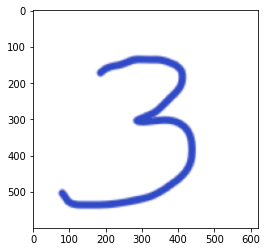

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('./myNumber.png')  
plt.imshow(img)

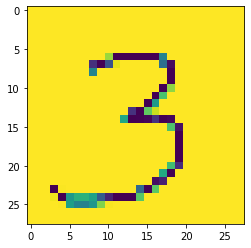

In [ ]:
import cv2
img = cv2.imread('./myNumber.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28) )
plt.imshow(img)

### 12.10 데이터의 전처리는 매우 중요하다

In [ ]:
pred = model.predict( img[np.newaxis, :, :])
pred.argmax()

5

In [ ]:
pred.argmax()

5

In [ ]:
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(img[i][j]), end='')
    print()

 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 229  80  80  80  80  80  80 158 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 104  80 124 249 255 255 255 255 255 143  85 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 159 255 255 255 255 255 255 255 255 255  80 255 255 255 255 255

In [ ]:
# 이미지의 색상을 반전시키고 0에서 1사이의 실수로 만들자
img = (255 - img) / 255
pred = model.predict( img[np.newaxis, :, :])
pred.argmax()

3

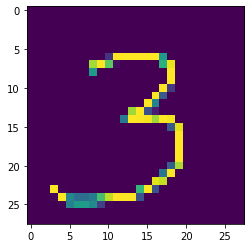

In [ ]:
plt.imshow(img)

### 12.11 붓꽃 데이터의 분류에 도전하자

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.20)
# 학습 데이터와 테스트 데이터의 형태와 개별 훈련 데이터의 형태를 살펴보자.
print('훈련용 데이터의 형태:', x_train.shape)
print('훈련용 데이터의 레이블 형태:',y_train.shape)
print('테스트용 데이터의 형태:', x_test.shape)
print('테스트용 데이터의 레이블 형태:',y_test.shape)
print('개별 훈련 데이터의 형태:', x_train[0].shape)

훈련용 데이터의 형태: (120, 4)
훈련용 데이터의 레이블 형태: (120,)
테스트용 데이터의 형태: (30, 4)
테스트용 데이터의 레이블 형태: (30,)
개별 훈련 데이터의 형태: (4,)


In [ ]:
from tensorflow import keras

# 순차 모델을 생성하자
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation= 'relu'),
    keras.layers.Dense(3, activation= 'softmax'),
])

# 모델 컴파일
model.compile(optimizer='adam',\
              loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=2)

Epoch 1/30
24/24 - 0s - loss: 1.3062 - accuracy: 0.2750
Epoch 2/30
24/24 - 0s - loss: 1.0164 - accuracy: 0.3667
Epoch 3/30
24/24 - 0s - loss: 0.8647 - accuracy: 0.5833
Epoch 4/30
24/24 - 0s - loss: 0.7312 - accuracy: 0.6917
Epoch 5/30
24/24 - 0s - loss: 0.6490 - accuracy: 0.7250
Epoch 6/30
24/24 - 0s - loss: 0.5952 - accuracy: 0.6917
Epoch 7/30
24/24 - 0s - loss: 0.5618 - accuracy: 0.7417
Epoch 8/30
24/24 - 0s - loss: 0.5239 - accuracy: 0.6917
Epoch 9/30
24/24 - 0s - loss: 0.5075 - accuracy: 0.8333
Epoch 10/30
24/24 - 0s - loss: 0.4854 - accuracy: 0.7000
Epoch 11/30
24/24 - 0s - loss: 0.4621 - accuracy: 0.7917
Epoch 12/30
24/24 - 0s - loss: 0.4427 - accuracy: 0.8417
Epoch 13/30
24/24 - 0s - loss: 0.4273 - accuracy: 0.8500
Epoch 14/30
24/24 - 0s - loss: 0.4147 - accuracy: 0.8833
Epoch 15/30
24/24 - 0s - loss: 0.4020 - accuracy: 0.9250
Epoch 16/30
24/24 - 0s - loss: 0.3880 - accuracy: 0.8583
Epoch 17/30
24/24 - 0s - loss: 0.3766 - accuracy: 0.9000
Epoch 18/30
24/24 - 0s - loss: 0.3662 - 

In [ ]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도 :', eval_acc)

신경망 모델의 학습 결과 :
1/1 [==============================] - 0s 92ms/step - loss: 0.2597 - accuracy: 0.9667
붓꽃 데이터의 분류 정확도 : 0.9666666388511658


### 12.12 분류 정확도를 높이기 위한 층을 추가하자

In [ ]:
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation= 'relu'),
    keras.layers.Dense(30, activation= 'relu'), # 새롭게 추가한 층
    keras.layers.Dense(3, activation= 'softmax'),
])

model.compile(optimizer='adam',\
              loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=0)
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도 :', eval_acc)

신경망 모델의 학습 결과 :
1/1 [==============================] - 0s 103ms/step - loss: 0.1359 - accuracy: 0.9667
붓꽃 데이터의 분류 정확도 : 0.9666666388511658


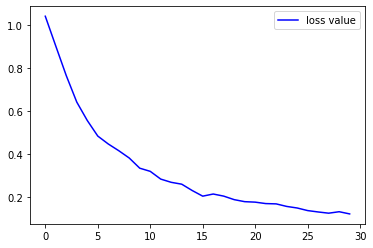

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'b-', label='loss value')
plt.legend()

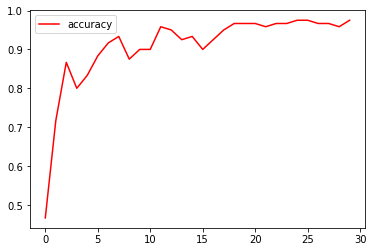

In [ ]:
plt.plot(hist.history['accuracy'], 'r-', label='accuracy')
plt.legend()

### 12.13 학습한 모델을 저장하고 불러오자

In [ ]:
model.save('./iris_60x30_model.h5')

In [ ]:
!ls -l

total 64
-rw-r--r-- 1 root root 59776 Sep 30 05:32 iris_60x30_model.h5
drwxr-xr-x 1 root root  4096 Sep 16 13:40 sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('./drive/MyDrive/iris_60x30_model.h5')

In [ ]:
loaded =keras.models.load_model('./drive/MyDrive/iris_60x30_model.h5')
loaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 93        
Total params: 2,223
Trainable params: 2,223
Non-trainable params: 0
_________________________________________________________________


### 12.14 수치값을 예측하는 딥러닝 모델

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

x_train = np.array([[0], [1], [2]])
y_train = 3 * x_train + 1  # y = 3x + 1 꼴의 함수

x_test = np.array([[3], [4], [5]])
y_test = 3 * x_test + 1  # y = 3x + 1 꼴의 함수

print('x_train :', x_train.flatten(),' y_train :', y_train.flatten())
print('x_test :', x_test.flatten(),' y_test :', y_test.flatten())

x_train : [0 1 2]  y_train : [1 4 7]
x_test : [3 4 5]  y_test : [10 13 16]


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4, input_shape=(1, )))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 5         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred = model.predict(x_test)
print(pred)

[[-0.2637667 ]
 [-0.35168898]
 [-0.43961117]]


In [ ]:
#model.compile('SGD', 'mse')
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=2)

Epoch 1/30
2/2 [==============================] - 0s 5ms/step - loss: 21.0712 - accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 5ms/step - loss: 10.2696 - accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 0s 5ms/step - loss: 5.0850 - accuracy: 0.3333
Epoch 4/30
2/2 [==============================] - 0s 5ms/step - loss: 2.0584 - accuracy: 0.3333
Epoch 5/30
2/2 [==============================] - 0s 9ms/step - loss: 0.4031 - accuracy: 0.3333
Epoch 6/30
2/2 [==============================] - 0s 5ms/step - loss: 0.1952 - accuracy: 0.3333
Epoch 7/30
2/2 [==============================] - 0s 9ms/step - loss: 0.1280 - accuracy: 0.3333
Epoch 8/30
2/2 [==============================] - 0s 7ms/step - loss: 0.1053 - accuracy: 0.3333
Epoch 9/30
2/2 [==============================] - 0s 4ms/step - loss: 0.0833 - accuracy: 0.3333
Epoch 10/30
2/2 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.3333
Epoch 11/30
2/2 [============

In [ ]:
pred = model.predict(x_test)
print('x_test :', x_test.flatten(),' 예측 :', pred.flatten())

x_test : [3 4 5]  예측 : [10.00016  13.000263 16.000366]


## 감사합니다